In [111]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
import math
import ast
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.rcParams['figure.figsize'] = (14.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 450)

In [112]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"
figure_folder = "../../figures"

### Import

In [113]:
methods= ["direct_and_pr", "iterative_pr_head_ref_cherry_picked"]

In [114]:
direct_and_pr = pd.read_csv(f"{csv_folder}/final_datasets/{methods[0]}_with_sw_metrics.csv", index_col=0)

In [115]:
iterative_pr_head_ref_cherry_picked = pd.read_csv(f"{csv_folder}/final_datasets/{methods[1]}_with_sw_metrics.csv", index_col=0)

In [116]:
methods_df = {"direct_and_pr":direct_and_pr,
             "iterative_pr_head_ref_cherry_picked": iterative_pr_head_ref_cherry_picked}

**Extracting the dependent variables** 

In [117]:
dep_var_cols = ["post_release_bugs", "fix_time", "dde", "critical_post_release_bugs", "minor_post_release_bugs"]

In [118]:
methods_dep_var = {}
for method in methods:
    methods_dep_var[method] = methods_df[method]\
    [dep_var_cols]

**Extracting the independent variables**

In [119]:
extra_info_cols = ['version_name','from_author_date', 'to_author_date', 'ahead_by', 'behind_by',
       'from_sha', 'to_sha', 'ahead_behind_sum', 'diff_author_dates',
       'diff_author_days', 'from_commit_date','to_commit_date', 'diff_commit_dates', 'diff_commit_days', 'to_tag',
       'from_tag']

In [120]:
pre_release_bugs_columns = ["pre_release_after_tagging_bugs","pre_release_bugs"]

In [121]:
methods_indep_var = {}
for method in methods:
    methods_indep_var[method] = methods_df[method].drop(columns=extra_info_cols + pre_release_bugs_columns + dep_var_cols)

In [122]:
methods_indep_var[methods[0]].columns

Index(['ratio_passed_builds', 'ratio_canceled_builds', 'ratio_failed_builds',
       'ratio_errored_builds', 'ratio_pr_builds', 'mean_all_build_duration',
       'median_all_build_duration', 'max_all_build_duration',
       'min_all_build_duration', 'mean_failed_build_duration',
       ...
       'max_n_exceptions', 'min_n_exceptions', 'mean_n_warnings',
       'median_n_warnings', 'max_n_warnings', 'min_n_warnings',
       'mean_n_error_classes', 'median_n_error_classes', 'max_n_error_classes',
       'min_n_error_classes'],
      dtype='object', length=265)

### Missing values

In [123]:
methods_indep_var[methods[0]].columns[\
                                    methods_indep_var[methods[1]].isna().sum()>0]

Index(['mean_failed_build_duration', 'median_failed_build_duration',
       'max_failed_build_duration', 'min_failed_build_duration',
       'mean_passed_build_duration', 'median_passed_build_duration',
       'max_passed_build_duration', 'min_passed_build_duration'],
      dtype='object')

In [124]:
methods_indep_var[methods[1]].columns[\
                                    methods_indep_var[methods[1]].isna().sum()>0]

Index(['mean_failed_build_duration', 'median_failed_build_duration',
       'max_failed_build_duration', 'min_failed_build_duration',
       'mean_passed_build_duration', 'median_passed_build_duration',
       'max_passed_build_duration', 'min_passed_build_duration'],
      dtype='object')

In [125]:
df = methods_indep_var[methods[0]]
df[df.min_failed_build_duration.isna()]

,ratio_passed_builds,ratio_canceled_builds,ratio_failed_builds,ratio_errored_builds,ratio_pr_builds,mean_all_build_duration,median_all_build_duration,max_all_build_duration,min_all_build_duration,mean_failed_build_duration,median_failed_build_duration,max_failed_build_duration,min_failed_build_duration,mean_passed_build_duration,median_passed_build_duration,max_passed_build_duration,min_passed_build_duration,mean_n_builds_per_pull_request,median_n_builds_per_pull_request,max_n_builds_per_pull_request,min_n_builds_per_pull_request,not_passed_gp1_bs1_n_bursts_mean,not_passed_gp1_bs1_n_bursts_median,not_passed_gp1_bs1_n_bursts_max,not_passed_gp1_bs1_n_bursts_min,not_passed_gp1_bs1_burst_size_mean,not_passed_gp1_bs1_burst_size_median,not_passed_gp1_bs1_burst_size_max,not_passed_gp1_bs1_burst_size_min,not_passed_gp1_bs2_n_bursts_mean,not_passed_gp1_bs2_n_bursts_median,not_passed_gp1_bs2_n_bursts_max,not_passed_gp1_bs2_n_bursts_min,not_passed_gp1_bs2_burst_size_mean,not_passed_gp1_bs2_burst_size_median,not_passed_gp1_bs2_burst_size_max,not_passed_gp1_bs2_burst_size_min,not_passed_gp1_bs3_n_bursts_mean,not_passed_gp1_bs3_n_bursts_median,not_passed_gp1_bs3_n_bursts_max,not_passed_gp1_bs3_n_bursts_min,not_passed_gp1_bs3_burst_size_mean,not_passed_gp1_bs3_burst_size_median,not_passed_gp1_bs3_burst_size_max,not_passed_gp1_bs3_burst_size_min,not_passed_gp2_bs1_n_bursts_mean,not_passed_gp2_bs1_n_bursts_median,not_passed_gp2_bs1_n_bursts_max,not_passed_gp2_bs1_n_bursts_min,not_passed_gp2_bs1_burst_size_mean,not_passed_gp2_bs1_burst_size_median,not_passed_gp2_bs1_burst_size_max,not_passed_gp2_bs1_burst_size_min,not_passed_gp2_bs2_n_bursts_mean,not_passed_gp2_bs2_n_bursts_median,not_passed_gp2_bs2_n_bursts_max,not_passed_gp2_bs2_n_bursts_min,not_passed_gp2_bs2_burst_size_mean,not_passed_gp2_bs2_burst_size_median,not_passed_gp2_bs2_burst_size_max,...,failed_gp2_bs3_n_bursts_mean,failed_gp2_bs3_n_bursts_median,failed_gp2_bs3_n_bursts_max,failed_gp2_bs3_n_bursts_min,failed_gp2_bs3_burst_size_mean,failed_gp2_bs3_burst_size_median,failed_gp2_bs3_burst_size_max,failed_gp2_bs3_burst_size_min,failed_gp3_bs1_n_bursts_mean,failed_gp3_bs1_n_bursts_median,failed_gp3_bs1_n_bursts_max,failed_gp3_bs1_n_bursts_min,failed_gp3_bs1_burst_size_mean,failed_gp3_bs1_burst_size_median,failed_gp3_bs1_burst_size_max,failed_gp3_bs1_burst_size_min,failed_gp3_bs2_n_bursts_mean,failed_gp3_bs2_n_bursts_median,failed_gp3_bs2_n_bursts_max,failed_gp3_bs2_n_bursts_min,failed_gp3_bs2_burst_size_mean,failed_gp3_bs2_burst_size_median,failed_gp3_bs2_burst_size_max,failed_gp3_bs2_burst_size_min,failed_gp3_bs3_n_bursts_mean,failed_gp3_bs3_n_bursts_median,failed_gp3_bs3_n_bursts_max,failed_gp3_bs3_n_bursts_min,failed_gp3_bs3_burst_size_mean,failed_gp3_bs3_burst_size_median,failed_gp3_bs3_burst_size_max,failed_gp3_bs3_burst_size_min,mean_errors_over_tests_total,median_errors_over_tests_total,max_errors_over_tests_total,min_errors_over_tests_total,mean_failed_tests,median_failed_tests,max_failed_tests,min_failed_tests,mean_failures_over_tests_total,median_failures_over_tests_total,max_failures_over_tests_total,min_failures_over_tests_total,mean_skipped_over_tests_total,median_skipped_over_tests_total,max_skipped_over_tests_total,min_skipped_over_tests_total,mean_n_exceptions,median_n_exceptions,max_n_exceptions,min_n_exceptions,mean_n_warnings,median_n_warnings,max_n_warnings,min_n_warnings,mean_n_error_classes,median_n_error_classes,max_n_error_classes,min_n_error_classes
34,1.000000,0.0,0.0,0.000000,0.0,1343.090909,1339.0,1529.0,1146.0,NaN,NaN,NaN,NaN,1343.090909,1339.0,1529.0,1146.0,11.000000,11.0,11,11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.501101,1.501109,3.0,0.002188,0.0,0.0,0.0,0.0,2.001101,2.001109,4.0,0.002188,0.000367,0.

Both datasets have missing values for duration due to no builds in that state being associated with that release.
We replace the values with 0.

In [126]:
for method in methods:
    methods_indep_var[method].fillna(0, inplace=True)

In [127]:
len(methods_indep_var[methods[1]].columns[\
                                    methods_indep_var[methods[1]].isna().sum()>0])\
+ len(methods_indep_var[methods[1]].columns[\
                                    methods_indep_var[methods[0]].isna().sum()>0])

0

### Drop columns with no information

In [128]:
for method in methods:
    df = methods_indep_var[method]
    nunique = df.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique == 1].index
    methods_indep_var[method] = df.drop(cols_to_drop, axis=1)
    print(methods_indep_var[method].shape)

(48, 214)
(48, 214)


### Correlation with dependent variable
https://dataschool.com/fundamentals-of-analysis/correlation-and-p-value/

We proceed with analysing the correlation of our attributed with the three software quality metricsm
We calculate both types of correlation:
* Pearons (linear)
* Spearman (monotonic, is pearson applied to ranks)

https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/#:~:text=The%20Pearson%20correlation%20evaluates%20the%20linear%20relationship%20between%20two%20continuous%20variables.&text=The%20Spearman%20correlation%20coefficient%20is,evaluate%20relationships%20involving%20ordinal%20variables.

In [130]:
methods_pearson_corr_post_release_bugs = {}
methods_spearman_corr_post_release_bugs = {}
for method in methods:
    data = []
    corr_col = methods_dep_var[method].post_release_bugs
    methods_pearson_corr_post_release_bugs[method] = methods_indep_var[method]\
                                            .corrwith(corr_col)
    methods_spearman_corr_post_release_bugs[method] = methods_indep_var[method]\
                                            .corrwith(corr_col, method="spearman")

**Method 0 correlation analysis**

In [131]:
df = methods_pearson_corr_post_release_bugs[methods[0]].sort_values()
df = df.reindex(df.abs().sort_values(ascending=False).index)
df.head(30)

max_n_builds_per_pull_request         0.574972
not_passed_gp2_bs3_burst_size_max     0.510884
canceled_gp2_bs3_burst_size_max       0.510884
failed_gp2_bs3_burst_size_max         0.510884
failed_gp2_bs2_burst_size_max         0.506784
canceled_gp2_bs2_burst_size_max       0.506784
not_passed_gp2_bs2_burst_size_max     0.506784
failed_gp2_bs1_burst_size_max         0.505601
canceled_gp2_bs1_burst_size_max       0.505601
not_passed_gp2_bs1_burst_size_max     0.505601
max_n_error_classes                   0.478651
not_passed_gp3_bs3_burst_size_max     0.430189
failed_gp3_bs3_burst_size_max         0.430189
canceled_gp3_bs3_burst_size_max       0.430189
not_passed_gp3_bs2_burst_size_max     0.425781
failed_gp3_bs2_burst_size_max         0.425781
canceled_gp3_bs2_burst_size_max       0.425781
not_passed_gp3_bs1_burst_size_max     0.423753
failed_gp3_bs1_burst_size_max         0.423753
canceled_gp3_bs1_burst_size_max       0.423753
canceled_gp3_bs3_burst_size_mean      0.409461
failed_gp3_bs

In [132]:
df = methods_spearman_corr_post_release_bugs[methods[0]].sort_values()
df = df.reindex(df.abs().sort_values(ascending=False).index)
df.head(30)

max_failed_tests                     0.595137
max_n_builds_per_pull_request        0.522220
canceled_gp1_bs2_n_bursts_max        0.503456
not_passed_gp1_bs2_n_bursts_max      0.503456
failed_gp1_bs2_n_bursts_max          0.503456
mean_failed_tests                    0.489458
canceled_gp3_bs1_n_bursts_max        0.472392
failed_gp3_bs1_n_bursts_max          0.472392
not_passed_gp3_bs1_n_bursts_max      0.472392
canceled_gp3_bs3_n_bursts_max        0.471400
failed_gp3_bs3_n_bursts_max          0.471400
not_passed_gp3_bs3_n_bursts_max      0.471400
not_passed_gp2_bs2_n_bursts_max      0.467010
failed_gp2_bs2_n_bursts_max          0.467010
canceled_gp2_bs2_n_bursts_max        0.467010
not_passed_gp2_bs3_n_bursts_max      0.462132
canceled_gp2_bs3_n_bursts_max        0.462132
failed_gp2_bs3_n_bursts_max          0.462132
failed_gp2_bs3_burst_size_max        0.456061
not_passed_gp2_bs3_burst_size_max    0.456061
canceled_gp2_bs3_burst_size_max      0.456061
canceled_gp3_bs2_n_bursts_max     

<AxesSubplot:>

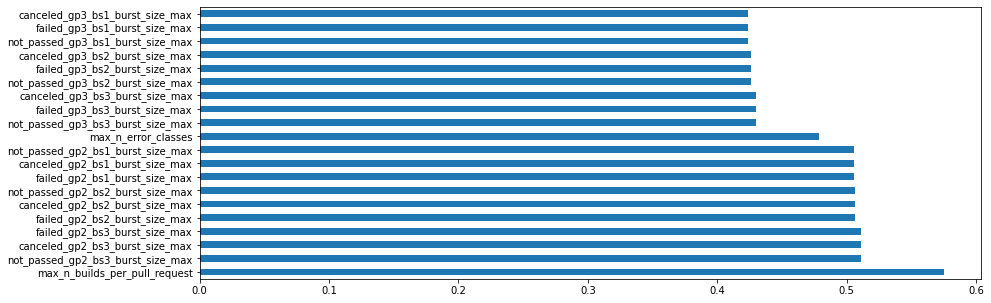

In [133]:
df = methods_pearson_corr_post_release_bugs[methods[0]].sort_values()
df = df.reindex(df.abs().sort_values(ascending=False).index)
df.head(20).plot(kind="barh")
#[[col for col in df.index if not "burst" in col]]

Text(0.5, 1.0, 'Top 20 spearman rank correlations with post release bugs (no burst metrics)')

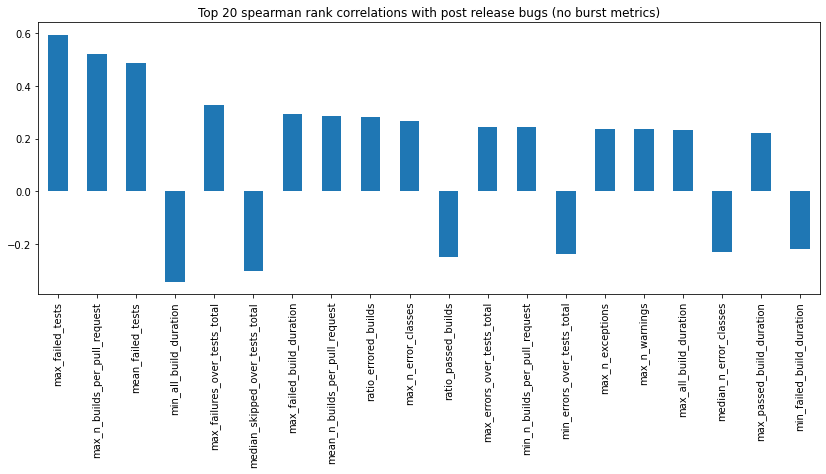

In [134]:
df = methods_spearman_corr_post_release_bugs[methods[0]].sort_values()
df = df.reindex(df.abs().sort_values(ascending=False).index)
ax = df[[col for col in df.index if not "burst" in col]].head(20).plot(kind="bar")
ax.set_title("Top 20 spearman rank correlations with post release bugs (no burst metrics)")

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_n_builds_per_pull_request', ylabel='post_release_bugs'>

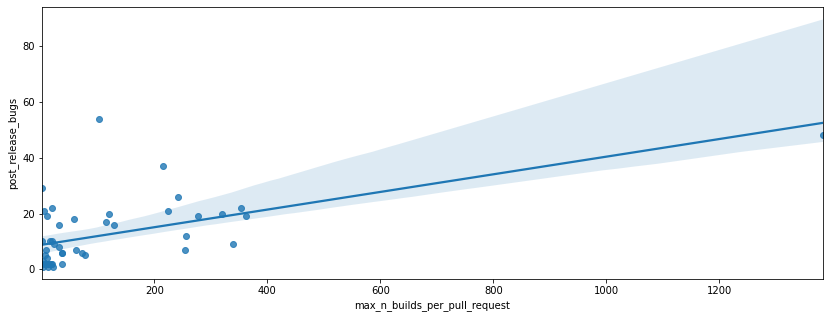

In [135]:
df_ind = methods_indep_var[methods[0]]
df_dep = methods_dep_var[methods[0]]
sns.regplot(df_ind.max_n_builds_per_pull_request, df_dep.post_release_bugs)

**Method 1 correlation analysis**

In [136]:
df = methods_pearson_corr_post_release_bugs[methods[1]].sort_values()
df = df.reindex(df.abs().sort_values(ascending=False).index)
df.head(30)

canceled_gp2_bs3_burst_size_max       0.510884
not_passed_gp2_bs3_burst_size_max     0.510884
failed_gp2_bs3_burst_size_max         0.510884
canceled_gp2_bs2_burst_size_max       0.506784
failed_gp2_bs2_burst_size_max         0.506784
not_passed_gp2_bs2_burst_size_max     0.506784
not_passed_gp2_bs1_burst_size_max     0.505601
failed_gp2_bs1_burst_size_max         0.505601
canceled_gp2_bs1_burst_size_max       0.505601
ratio_passed_builds                  -0.446167
failed_gp3_bs3_burst_size_max         0.430189
not_passed_gp3_bs3_burst_size_max     0.430189
canceled_gp3_bs3_burst_size_max       0.430189
failed_gp3_bs2_burst_size_max         0.425781
not_passed_gp3_bs2_burst_size_max     0.425781
canceled_gp3_bs2_burst_size_max       0.425781
failed_gp3_bs1_burst_size_max         0.423753
canceled_gp3_bs1_burst_size_max       0.423753
not_passed_gp3_bs1_burst_size_max     0.423753
canceled_gp3_bs3_burst_size_mean      0.409461
failed_gp3_bs3_burst_size_mean        0.409461
not_passed_gp

In [137]:
df = methods_spearman_corr_post_release_bugs[methods[1]].sort_values()
df = df.reindex(df.abs().sort_values(ascending=False).index)
df.head(30)

max_failed_tests                     0.573377
max_n_builds_per_pull_request        0.518236
mean_failed_tests                    0.513583
canceled_gp1_bs2_n_bursts_max        0.503456
failed_gp1_bs2_n_bursts_max          0.503456
not_passed_gp1_bs2_n_bursts_max      0.503456
canceled_gp3_bs1_n_bursts_max        0.472392
not_passed_gp3_bs1_n_bursts_max      0.472392
failed_gp3_bs1_n_bursts_max          0.472392
canceled_gp3_bs3_n_bursts_max        0.471400
failed_gp3_bs3_n_bursts_max          0.471400
not_passed_gp3_bs3_n_bursts_max      0.471400
canceled_gp2_bs2_n_bursts_max        0.467010
failed_gp2_bs2_n_bursts_max          0.467010
not_passed_gp2_bs2_n_bursts_max      0.467010
canceled_gp2_bs3_n_bursts_max        0.462132
failed_gp2_bs3_n_bursts_max          0.462132
not_passed_gp2_bs3_n_bursts_max      0.462132
not_passed_gp2_bs3_burst_size_max    0.456061
canceled_gp2_bs3_burst_size_max      0.456061
failed_gp2_bs3_burst_size_max        0.456061
canceled_gp3_bs2_n_bursts_max     

<AxesSubplot:>

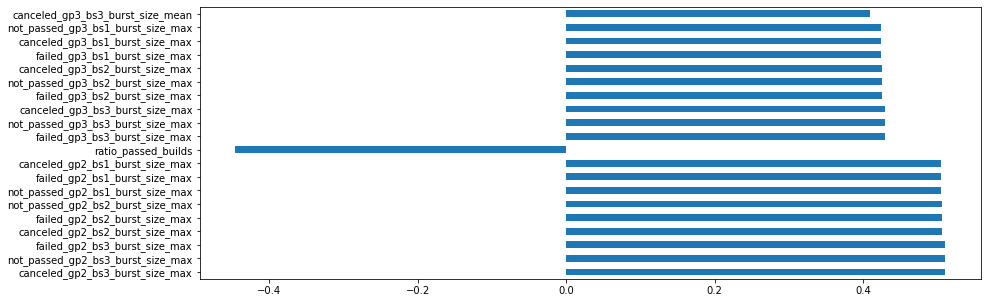

In [138]:
df = methods_pearson_corr_post_release_bugs[methods[1]].sort_values()
df = df.reindex(df.abs().sort_values(ascending=False).index)
df.head(20).plot(kind="barh")
#[[col for col in df.index if not "burst" in col]]

Text(0.5, 1.0, 'Top 20 spearman rank correlations with post release bugs (no burst metrics)')

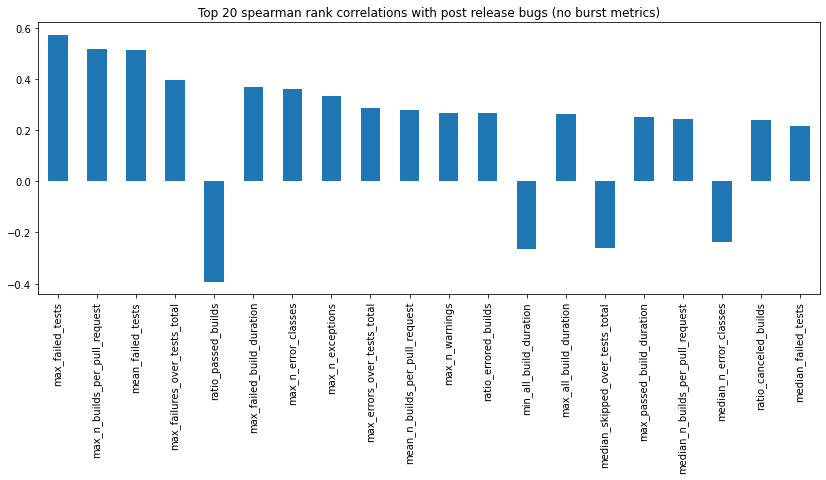

In [139]:
df = methods_spearman_corr_post_release_bugs[methods[1]].sort_values()
df = df.reindex(df.abs().sort_values(ascending=False).index)
ax = df[[col for col in df.index if not "burst" in col]].head(20).plot(kind="bar")
ax.set_title("Top 20 spearman rank correlations with post release bugs (no burst metrics)")

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='canceled_gp2_bs3_burst_size_max', ylabel='post_release_bugs'>

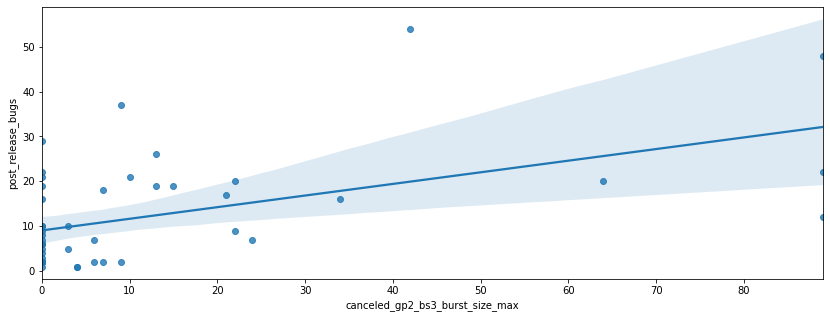

In [140]:
df_ind = methods_indep_var[methods[1]]
df_dep = methods_dep_var[methods[1]]
sns.regplot(df_ind.canceled_gp2_bs3_burst_size_max, df_dep.post_release_bugs)

### Correlation among features

In [171]:
corr_matrix = methods_indep_var[methods[0]].corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
cols_to_remove = [pairs[1] for pairs in sol[sol == 1].index]

In [172]:
len(set(cols_to_remove))

116

In [168]:
corr_matrix = methods_indep_var[methods[0]].drop(columns=cols_to_remove).corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [170]:
sol

not_passed_gp1_bs2_burst_size_mean  not_passed_gp1_bs2_burst_size_median    0.947838
not_passed_gp2_bs1_n_bursts_median  not_passed_gp3_bs1_n_bursts_median      0.942480
not_passed_gp3_bs1_burst_size_mean  not_passed_gp3_bs1_burst_size_median    0.938672
not_passed_gp3_bs2_burst_size_mean  not_passed_gp3_bs2_burst_size_median    0.938387
not_passed_gp2_bs2_n_bursts_mean    not_passed_gp3_bs2_n_bursts_mean        0.936866
                                                                              ...   
not_passed_gp1_bs1_n_bursts_median  mean_failed_tests                       0.000554
not_passed_gp1_bs2_n_bursts_median  median_n_warnings                       0.000300
ratio_passed_builds                 max_errors_over_tests_total             0.000253
not_passed_gp1_bs1_burst_size_mean  not_passed_gp2_bs1_n_bursts_median      0.000140
not_passed_gp1_bs1_n_bursts_median  median_n_error_classes                  0.000000
Length: 2016, dtype: float64

In [174]:
methods_indep_var[methods[1]].drop(columns=cols_to_remove).shape

(48, 98)